### Mô hình ngôn ngữ và ứng dụng trong việc sinh văn bản

Yêu cầu: 
a)	Xây dựng mô hình ngôn ngữ như là bài toán phân loại sử dụng CNN và GRU.
b)	Làm sao giải quyết vấn đề sparse data (dữ liệu thưa) trong mô hình này? 


#### Câu hỏi 1: Đọc file input lấy max = 1000

In [ ]:
# đọc file
filename='NLP.txt'

#YOUR CODE HERE

#END YOUR CODE

print(len(lines))
print(lines[:5])          

#### Câu hỏi 2: Tokenize, thêm ký hiệu '\<s\>' đầu câu, '\</s\>' cuối câu
Gợi ý: dùng thư viện underthesea để tokenize tiếng việt

In [ ]:
# tokenize sentences 

#YOUR CODE HERE

#END YOUR CODE

print('all_tokens_count=',all_tokens_count)
print(len(sentences))
print(sentences[:5])

#### Câu hỏi 3: Tạo dữ liệu training w(i-k)...w(i-1) dự đoán w(i)

In [ ]:

import random 
def get_instances(sent):
    #YOUR CODE HERE
    # viết code tạo random t instances từ câu 'sent'
    #END YOUR CODE

data=[]
for sent in sentences:
    data.extend(get_instances(sent))
print(len(data))

# test thử hàm get_instances
'''
samples = get_instances(sentences[0])
for instance in samples:
    print(instance)
'''

7749


'\nsamples = get_instances(sentences[0])\nfor instance in samples:\n    print(instance)\n'

#### Câu hỏi 4: Hiển thị bản đồ histogram của data

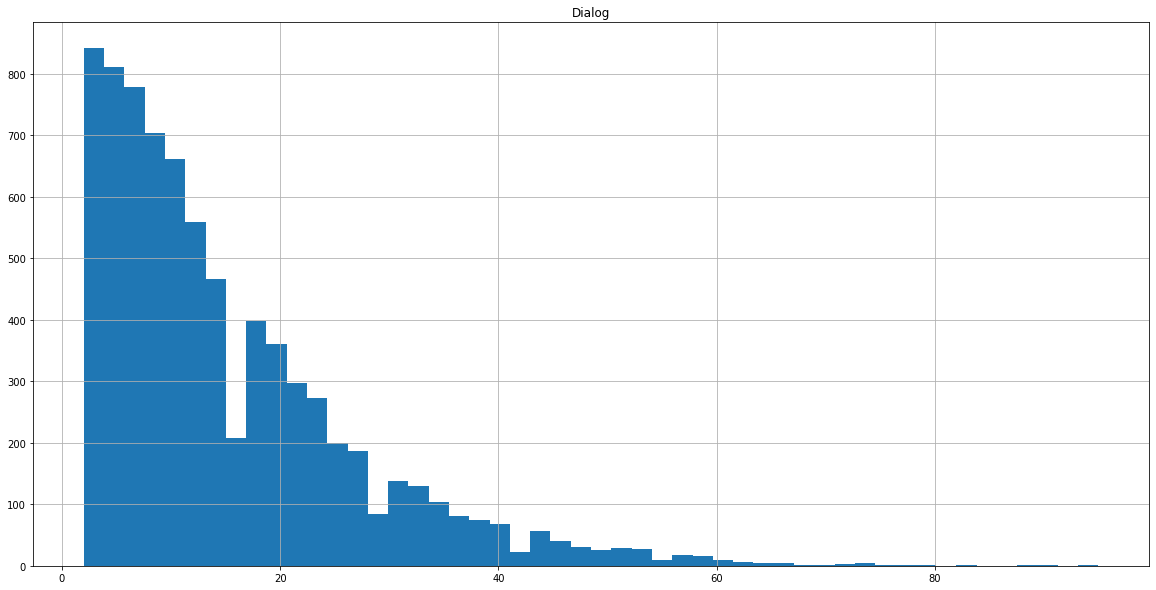

In [ ]:
# Bản đồ histogram của data 
import pandas as pd
import matplotlib.pyplot as plt

#YOUR CODE HERE

#END YOUR CODE
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [ ]:
# lấy max của độ dài để dự đoán từ tiếp theo
max_sequence_len=20

data1 = [' '.join(x) for x in data]

tokenizer = Tokenizer(filters='') 
tokenizer.fit_on_texts(data1)
#print(tokenizer.word_index)
vocab_size = len(tokenizer.word_index) + 1
print('vocab size:',vocab_size)

vocab size: 2991


#### Câu hỏi 5: Chuẩn hóa input 

In [ ]:
#YOUR CODE HERE
data_sequence = tokenizer.texts_to_sequences(data1)
y_data=....
.....

X_data = pad_sequences(.....)
#END YOUR CODE

print(X_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1  102]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     1  102   22  138  866  182]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1  102
    22  138  866  182 1304   65]]


In [ ]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1  103   22]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1  103
    22  124  718  173 1183   64]
 [   0    0    0    0    0    0    0    0    0    1  103   22  124  718
   173 1183   64   30   68   37]]
[22 64 37]


In [ ]:
#y_data = keras.utils.to_categorical(y_data,num_classes=vocab_size)
print(y_data.shape)
print(y_data[0])

(7737,)
22


In [ ]:
def get_params():
    return {'max_seq_len': max_sequence_len, 'vocab_size':vocab_size }

params = get_params()

inputs = keras.layers.Input(shape=(params['max_seq_len'],))
embedding = keras.layers.Embedding(params['vocab_size'], 200, input_length=params['max_seq_len'])(inputs)
print(inputs.shape)
print(embedding.shape)

(None, 20)
(None, 20, 200)


#### Câu hỏi 6: Xây dựng mô hình ngôn ngữ sử dụng CNN 


In [ ]:
#YOUR CODE HERE
# Viết code building CNN model

#END YOUR CODE

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model.summary()

In [ ]:
type(y_data),len(y_data)

(numpy.ndarray, 7737)

In [ ]:
print(X_data.shape)
model.fit(X_data,y_data,batch_size=100, epochs=3)
   

(7737, 20)
Epoch 1/3
78/78 [==============================] - 4s 54ms/step - loss: 6.6931 - accuracy: 0.0685
Epoch 2/3
78/78 [==============================] - 4s 53ms/step - loss: 5.3050 - accuracy: 0.1059
Epoch 3/3
78/78 [==============================] - 4s 54ms/step - loss: 4.6469 - accuracy: 0.2025


#### Câu hỏi 7: Xây dựng mô hình ngôn ngữ sử dụng GRU 

In [ ]:
inputs2 = keras.layers.Input(shape=(params['max_seq_len'],))
embedding2 = keras.layers.Embedding(params['vocab_size'], 200, input_length=params['max_seq_len'])(inputs2)

#YOUR CODE HERE
# Viết code building LSTM model

#END YOUR CODE

model2 = keras.Model(inputs=inputs2, outputs=dense2)
model2.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model2.summary()

In [ ]:
model2.fit(X_data,y_data,batch_size=100, epochs=3)   